# TCS ION Internship - HR-Salary Prediction Dashboard
## By Hussain

### Objective : The objective of this project is to build a salary prediction dashboard for HRs

In [96]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading Dataset

In [97]:
data = pd.read_csv('HRDataset_v14.csv')
print("data :", data.shape)

data : (311, 36)


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

## Analysing data

In [99]:
# display all  columns
pd.set_option('display.max_columns', None)

data.head() #view first 5 rows

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/1983,M,Single,US Citizen,No,White,07/05/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.00,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/1975,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.00,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,07/05/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.00,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,01/07/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.00,Indeed,Fully Meets,4.84,5,0,01/03/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/1989,F,Divorced,US Citizen,No,White,07/11/2011,09/06/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.00,Google Search,Fully Meets,5.00,4,0,02/01/2016,0,2


In [100]:
data.tail() #view last 5 rows

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,0,20,Production Technician II,MA,1810,05/11/1985,M,Single,US Citizen,No,White,07/07/2014,NaN,N/A-StillEmployed,Active,Production,Kissy Sullivan,20.00,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,1,19,Production Technician I,MA,2458,05/04/1982,F,Single,US Citizen,No,Asian,09/02/2008,9/29/2015,Another position,Voluntarily Terminated,Production,Brannon Miller,12.00,Google Search,PIP,3.20,2,0,09/02/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,0,6,CIO,MA,2067,08/30/79,F,Single,US Citizen,No,White,04/10/2010,NaN,N/A-StillEmployed,Active,IT/IS,Janet King,2.00,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,0,9,Data Analyst,MA,2148,02/24/79,F,Single,US Citizen,No,White,3/30/2015,NaN,N/A-StillEmployed,Active,IT/IS,Simon Roup,4.00,Employee Referral,Fully Meets,5.00,3,5,02/01/2019,0,11
310,"Zima, Colleen",10271,0,4,0,1,5,3,0,45046,0,19,Production Technician I,MA,1730,08/17/78,F,Widowed,US Citizen,No,Asian,9/29/2014,NaN,N/A-StillEmployed,Active,Production,David Stanley,14.00,LinkedIn,Fully Meets,4.50,5,0,1/30/2019,0,2


We have 310 records now. 

In [101]:
# lets check the data

# Get an idea of the data using descriptive statistics. This gives count of non-null values, mean, 
# standard deviation, mximum and minimum values, and IQR - 25th, 50th and 75th Quartile of the dataset as well.

data.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00,303.00,311.00,311.00,311.00,311.00,311.00
mean,10156.00,0.40,0.81,0.43,2.39,4.61,2.98,0.09,69020.68,0.33,16.85,6555.48,14.57,4.11,3.89,1.22,0.41,10.24
std,89.92,0.49,0.94,0.50,1.79,1.08,0.59,0.29,25156.64,0.47,6.22,16908.40,8.08,0.79,0.91,2.35,1.29,5.85
min,10001.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,45046.00,0.00,1.00,1013.00,1.00,1.12,1.00,0.00,0.00,1.00
25%,10078.50,0.00,0.00,0.00,1.00,5.00,3.00,0.00,55501.50,0.00,18.00,1901.50,10.00,3.69,3.00,0.00,0.00,5.00
50%,10156.00,0.00,1.00,0.00,1.00,5.00,3.00,0.00,62810.00,0.00,19.00,2132.00,15.00,4.28,4.00,0.00,0.00,10.00
75%,10233.50,1.00,1.00,1.00,5.00,5.00,3.00,0.00,72036.00,1.00,20.00,2355.00,19.00,4.70,5.00,0.00,0.00,15.00
max,10311.00,1.00,4.00,1.00,5.00,6.00,4.00,1.00,250000.00,1.00,30.00,98052.00,39.00,5.00,5.00,8.00,6.00,20.00


In [102]:
# Statistical Summary of Numberical data:
data.describe(include=np.number)

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00,303.00,311.00,311.00,311.00,311.00,311.00
mean,10156.00,0.40,0.81,0.43,2.39,4.61,2.98,0.09,69020.68,0.33,16.85,6555.48,14.57,4.11,3.89,1.22,0.41,10.24
std,89.92,0.49,0.94,0.50,1.79,1.08,0.59,0.29,25156.64,0.47,6.22,16908.40,8.08,0.79,0.91,2.35,1.29,5.85
min,10001.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,45046.00,0.00,1.00,1013.00,1.00,1.12,1.00,0.00,0.00,1.00
25%,10078.50,0.00,0.00,0.00,1.00,5.00,3.00,0.00,55501.50,0.00,18.00,1901.50,10.00,3.69,3.00,0.00,0.00,5.00
50%,10156.00,0.00,1.00,0.00,1.00,5.00,3.00,0.00,62810.00,0.00,19.00,2132.00,15.00,4.28,4.00,0.00,0.00,10.00
75%,10233.50,1.00,1.00,1.00,5.00,5.00,3.00,0.00,72036.00,1.00,20.00,2355.00,19.00,4.70,5.00,0.00,0.00,15.00
max,10311.00,1.00,4.00,1.00,5.00,6.00,4.00,1.00,250000.00,1.00,30.00,98052.00,39.00,5.00,5.00,8.00,6.00,20.00


In [103]:
# Statistical Summary of categorical data:
data.describe(include='O')

,Employee_Name,Position,State,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,LastPerformanceReview_Date
count,311,311,311,311,311,311,311,311,311,311,104,311,311,311,311,311,311,311
unique,311,32,28,307,2,5,3,4,6,101,96,18,3,6,21,9,4,137
top,"Landa, Hans",Production Technician I,MA,09/09/1965,F,Single,US Citizen,No,White,01/10/2011,6/18/2013,N/A-StillEmployed,Active,Production,Kissy Sullivan,Indeed,Fully Meets,1/14/2019
freq,1,137,276,2,176,137,295,282,187,14,2,207,207,209,22,87,243,18


## Clean and Sanitise Dataset

In [104]:
# Find duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

# first look for duplicate records
data[data.duplicated()]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences


No duplicates found. 

In [105]:
# Now look for missing salary
data[data['Salary']<=0]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences


There is no missing salary. 

In [106]:
# Now look for any null values
data.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

Observation:
1. DateofTermination has 207 null values. That means those are currently employed. Keep the column for now and we will use it for experience calculation.
2. ManagerID has 8 null values. This column doesn't have any significance in our salary prediction. So keep it as it is now and will be excepted during salary prediction.

In [107]:
# Now set proper format for date fields (DOB, DateofHire, DateofTermination and LastPerformanceReview_Date)

# First check the raw data
data[['DOB','DateofHire','DateofTermination','LastPerformanceReview_Date']].head(5)

,DOB,DateofHire,DateofTermination,LastPerformanceReview_Date
0,07/10/1983,07/05/2011,NaN,1/17/2019
1,05/05/1975,3/30/2015,6/16/2016,2/24/2016
2,09/19/88,07/05/2011,9/24/2012,5/15/2012
3,09/27/88,01/07/2008,NaN,01/03/2019
4,09/08/1989,07/11/2011,09/06/2016,02/01/2016


In [108]:
# Now convert these to datetime

data['DateofHire'] = pd.to_datetime(data['DateofHire'])
data['DateofTermination'] = pd.to_datetime(data['DateofTermination'])
data['LastPerformanceReview_Date'] = pd.to_datetime(data['LastPerformanceReview_Date'])
data['DOB'] = pd.to_datetime(data['DOB'])

# Verify and confirm
data[['DOB','DateofHire','DateofTermination','LastPerformanceReview_Date']].head(5)

,DOB,DateofHire,DateofTermination,LastPerformanceReview_Date
0,1983-07-10,2011-07-05,NaT,2019-01-17
1,1975-05-05,2015-03-30,2016-06-16,2016-02-24
2,1988-09-19,2011-07-05,2012-09-24,2012-05-15
3,1988-09-27,2008-01-07,NaT,2019-01-03
4,1989-09-08,2011-07-11,2016-09-06,2016-02-01


In [109]:
# To ensure data perfection, check histogram of the converted data

<AxesSubplot:>

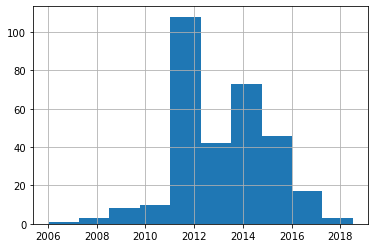

In [110]:
data['DateofHire'].hist()

<AxesSubplot:>

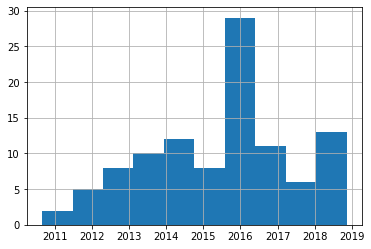

In [111]:
data['DateofTermination'].hist()

<AxesSubplot:>

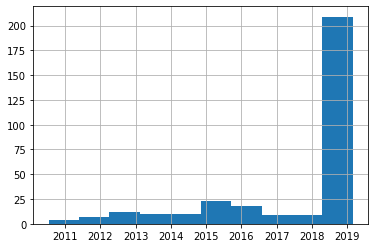

In [112]:
data['LastPerformanceReview_Date'].hist()

<AxesSubplot:>

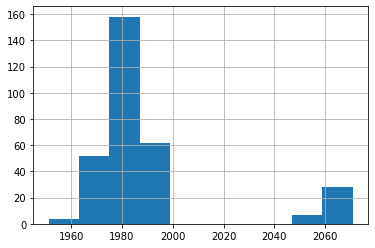

In [113]:
data['DOB'].hist()

Seems all data is fine except DOB. This is due to data entered in the dataset as dd/mm/yy format instead of dd/mm/yyyy format.

In [114]:
# To correcct this data, deduct 100 years from the DOB for the birth year greaer than current year

data['DOB'] = np.where(data['DOB'] > '2000-01-01', data['DOB'] - pd.DateOffset(years=100), data['DOB'])

<AxesSubplot:>

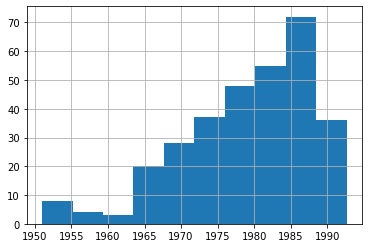

In [115]:
data['DOB'].hist()

Now the DOB is correct.

In [116]:
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,No,White,2011-07-05,NaT,N/A-StillEmployed,Active,Production,Michael Albert,22.00,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.00,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,1988-09-19,F,Married,US Citizen,No,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.00,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,1988-09-27,F,Married,US Citizen,No,White,2008-01-07,NaT,N/A-StillEmployed,Active,Production,Elijiah Gray,16.00,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,1989-09-08,F,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,39.00,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2


In [117]:
# Remove extra space from string values
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,No,White,2011-07-05,NaT,N/A-StillEmployed,Active,Production,Michael Albert,22.00,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.00,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,1988-09-19,F,Married,US Citizen,No,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.00,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,1988-09-27,F,Married,US Citizen,No,White,2008-01-07,NaT,N/A-StillEmployed,Active,Production,Elijiah Gray,16.00,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,1989-09-08,F,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,39.00,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2


/Users/hussain/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hussain/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


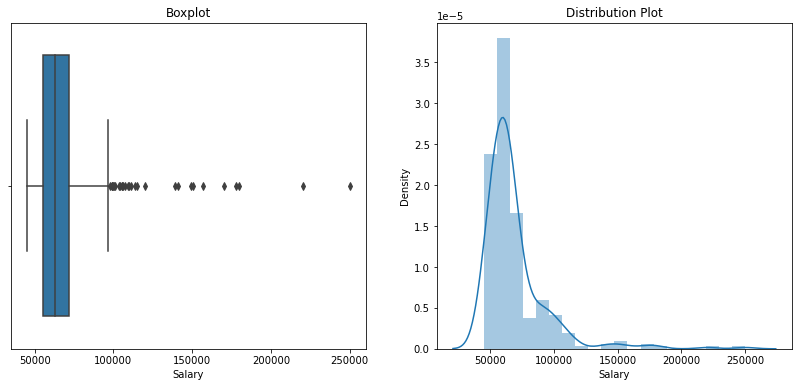

In [118]:
# Visualize the target variable - Salary
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title('Boxplot')
sns.boxplot(data.Salary)

plt.subplot(1,2,2)
plt.title('Distribution Plot')
sns.distplot(data.Salary, bins=20)
plt.show()

There are outliers in the target column (left panel). Furhter analysis would guide us how to tackle these outliers. There can be many reasons for outliers. It can be incorrectly reported or some unsual data. 
Right box plot shows that the data is normally distributed.

In [119]:
# Below function to check outliers.
def outlier(df):
    stat=df.describe()
    IQR=stat['75%']-stat['25%']
    upper=stat['75%']+1.5*IQR
    lower=stat['25%']-1.5*IQR
    print('The upper and lower bounds for outliers are {} and {}'.format(upper,lower))

In [120]:
outlier(data.Salary)

The upper and lower bounds for outliers are 96837.75 and 30699.75


In [121]:
# Get low and up into datasets
outliers_low=data[data.Salary<30699.75]
outliers_up=data[data.Salary>96837.75]

In [122]:
# Outliers below the first quartiles
outliers_low

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences


Seems there is no salary below the first quartile.

In [123]:
# outliers below the upper bound
outliers_up

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.00,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
18,"Becker, Renee",10245,0,0,0,4,3,3,0,110000,1,8,Database Administrator,MA,2026,1986-04-04,F,Single,US Citizen,Yes,White,2014-07-07,2015-09-12,performance,Terminated for Cause,IT/IS,Simon Roup,4.00,Google Search,Fully Meets,4.50,4,5,2015-01-15,0,8
25,"Booth, Frank",10199,0,0,1,4,3,3,0,103613,1,30,Enterprise Architect,CT,6033,1964-07-30,M,Single,US Citizen,No,Black or African American,2014-02-17,2016-02-19,Learned that he is a gangster,Terminated for Cause,IT/IS,Simon Roup,4.00,LinkedIn,Fully Meets,3.50,5,7,2016-01-10,0,2
26,"Boutwell, Bonalyn",10081,1,1,0,1,1,3,1,106367,0,26,Sr. Accountant,MA,2468,1987-04-04,F,Married,US Citizen,No,Black or African American,2015-02-16,NaT,N/A-StillEmployed,Active,Admin Offices,Brandon R. LeBlanc,3.00,Diversity Job Fair,Fully Meets,5.00,4,3,2019-02-18,0,4
39,"Carr, Claudia N",10082,0,0,0,2,3,3,0,100031,0,27,Sr. DBA,MA,1886,1986-06-06,F,Single,US Citizen,No,Black or African American,2016-06-30,NaT,N/A-StillEmployed,Active,IT/IS,Simon Roup,4.00,LinkedIn,Fully Meets,5.00,5,6,2019-02-18,0,7
42,"Champaigne, Brian",10108,1,1,1,1,3,3,0,110929,0,5,BI Director,MA,2045,1972-02-09,M,Married,US Citizen,No,White,2016-09-06,NaT,N/A-StillEmployed,Active,IT/IS,Jennifer Zamora,5.00,Indeed,Fully Meets,4.50,5,7,2019-01-15,0,8
55,"Corleone, Vito",10019,0,0,1,1,5,4,0,170500,0,10,Director of Operations,MA,2030,1983-03-19,M,Single,US Citizen,No,Black or African American,2009-01-05,NaT,N/A-StillEmployed,Active,Production,Janet King,2.00,Indeed,Exceeds,3.70,5,0,2019-02-04,0,15
66,"Del Bosque, Keyla",10155,0,0,0,1,4,3,0,101199,0,24,Software Engineer,MA,2176,1979-07-05,F,Single,US Citizen,No,Black or African American,2012-01-09,NaT,N/A-StillEmployed,Active,Software Engineering,Alex Sweetwater,10.00,CareerBuilder,Fully Meets,3.79,5,5,2019-01-25,0,8
76,"Dougall, Eric",10028,0,0,1,1,3,4,0,138888,0,13,IT Manager - Support,MA,1886,1970-07-09,M,Single,US Citizen,No,Black or African American,2014-01-05,NaT,N/A-StillEmployed,Active,IT/IS,Jennifer Zamora,5.00,Indeed,Exceeds,4.30,5,5,2019-01-04,0,4
86,"Exantus, Susan",10290,1,1,0,4,4,2,0,99280,1,24,Software Engineer,MA,1749,1987-05-15,F,Married,US Citizen,No,Black or African American,2011-05-02,2013-06-05,attendance,Terminated for Cause,Software Engineering,Alex Sweetwater,10.00,Indeed,Needs Improvement,2.10,5,4,2012-08-10,4,19


In [124]:
outliers_up.shape

(29, 36)

There are 29 records above the third quartile. We need to check if these above ranges are really outliers or not. 
If we take a close look at the data it is found that junior position is also paid above that outlier.

In [125]:
# We can consider columns like Position, Department and Salary for this verification
# Groupby based on Position
outliers_up.groupby('Position')['Salary'].mean().sort_values()

Position
BI Developer                99020.00
Sr. DBA                    102234.00
Sr. Accountant             102859.00
Software Engineer          103114.00
Enterprise Architect       103613.00
Sr. Network Engineer       107226.00
Database Administrator     108499.60
BI Director                110929.00
Principal Data Architect   120000.00
IT Manager - Support       138888.00
IT Manager - DB            144959.50
Data Architect             150290.00
IT Manager - Infra         157000.00
Director of Operations     170500.00
IT Director                178000.00
Director of Sales          180000.00
CIO                        220450.00
President & CEO            250000.00
Name: Salary, dtype: float64

In [126]:
data[data.Salary<96837.75].groupby('Position')['Salary'].mean().sort_values()

Position
Administrative Assistant       52280.00
Production Technician I        55524.18
Network Engineer               61605.00
Accountant I                   63507.67
IT Support                     63684.38
Production Technician II       64892.21
Area Sales Manager             64932.56
Sales Manager                  69240.00
Production Manager             75294.50
Software Engineering Manager   77692.00
Senior BI Developer            84802.67
Sr. Network Engineer           89532.00
Data Analyst                   89756.88
Software Engineer              90324.40
Shared Services Manager        93046.00
BI Developer                   94280.00
Name: Salary, dtype: float64

Based on position, it seems the higher-paying jobs are C-Level, so we can't consider those as an outlier. 

In [127]:
# Now check based on Department
outliers_up.groupby('Department')['Salary'].mean().sort_values()

Department
Admin Offices          102859.00
Software Engineering   103114.00
IT/IS                  127489.53
Production             170500.00
Sales                  180000.00
Executive Office       250000.00
Name: Salary, dtype: float64

In [128]:
data[data.Salary<96837.75].groupby('Department')['Salary'].mean().sort_values()

Department
Production             59422.07
Admin Offices          62915.57
Sales                  65363.30
IT/IS                  78417.13
Software Engineering   88219.00
Name: Salary, dtype: float64

Based on Department, it seems the higher-paying jobs are in relevant departments, so we can't consider those as an outlier. 

## Visualize Data

<AxesSubplot:ylabel='Sex'>

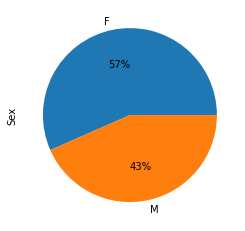

In [129]:
# Gender in the dataset
data.Sex.str.get_dummies().sum().plot.pie(label='Sex', autopct='%1.0f%%')

This shows most employees in the dataset is females.


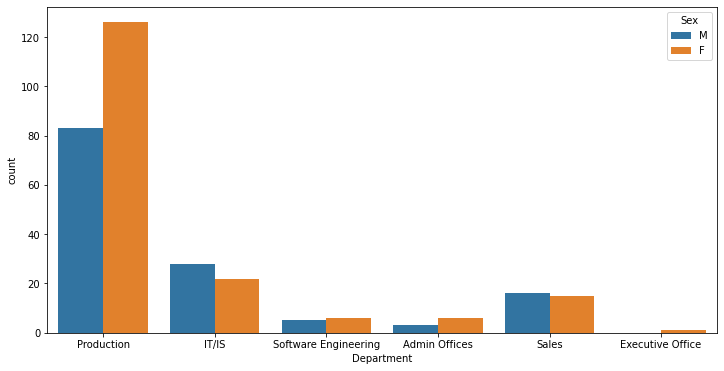

In [130]:
# Now check Gender diversity across departmets

plt.figure(figsize=(12,6))
ax=sns.countplot(x=data['Department'],hue=data['Sex'])

It is observed that there are no males in the executive office.

Gender diversity is not there mostly in the production department.

<AxesSubplot:ylabel='RaceDesc'>

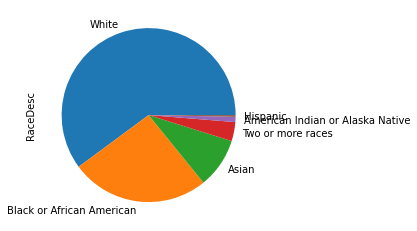

In [131]:
# Now check data by race

data['RaceDesc'].value_counts().plot(kind='pie')

Most employees are White, then Black/African American, then Asian and then others

<AxesSubplot:>

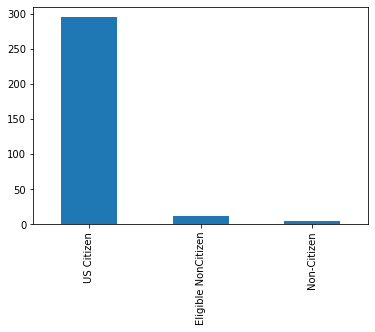

In [132]:
# Now check by Citizen Description
data['CitizenDesc'].value_counts().plot(kind='bar')

In [133]:
# Show histogram based on Age
# We have no age column in the dataset, so add a column based on the DOB using below function

from datetime import datetime, date

def ageCalc(born):
    today = date.today()
    return today.year - born.year

data['Age'] = data['DOB'].apply(ageCalc)
data['Age']


0      38
1      46
2      33
3      33
4      32
       ..
306    36
307    39
308    42
309    42
310    43
Name: Age, Length: 311, dtype: int64

<AxesSubplot:>

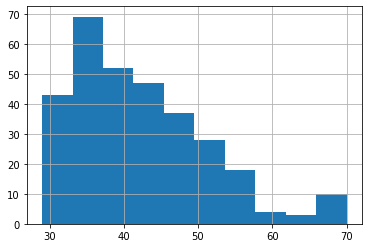

In [134]:
# Now show histogram for age

data['Age'].hist()

<AxesSubplot:>

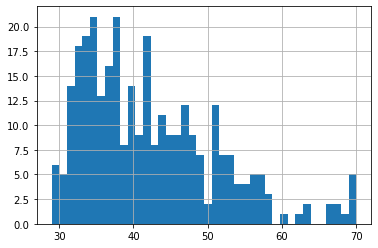

In [135]:
# Now show histogram for age

data['Age'].hist(bins=40)

In [136]:
# Show histogram based on Years of Experience
# We have no Years of Experience column in the dataset, so add a column based on the DateofHire and DateofTermination (if available) 
# using below function. This may not show the full experience of the employee before the current employment, but useful 

def experienceCalc(doj, dot):
    today = date.today()
    return np.where(pd.isna(dot), today.year - doj.dt.year, dot.dt.year - doj.dt.year)
 
data['YearsOfExperience'] = experienceCalc(data['DateofHire'], data['DateofTermination'])
data[['YearsOfExperience']]


,YearsOfExperience
0,10.00
1,1.00
2,1.00
3,13.00
4,5.00
...,...
306,7.00
307,7.00
308,11.00
309,6.00


<AxesSubplot:>

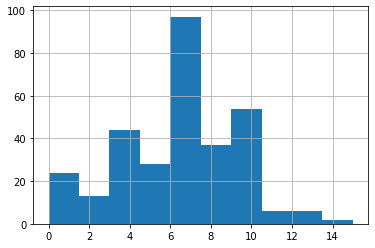

In [137]:
# Now show histogram for YearsOfExperience

data['YearsOfExperience'].hist()

<AxesSubplot:>

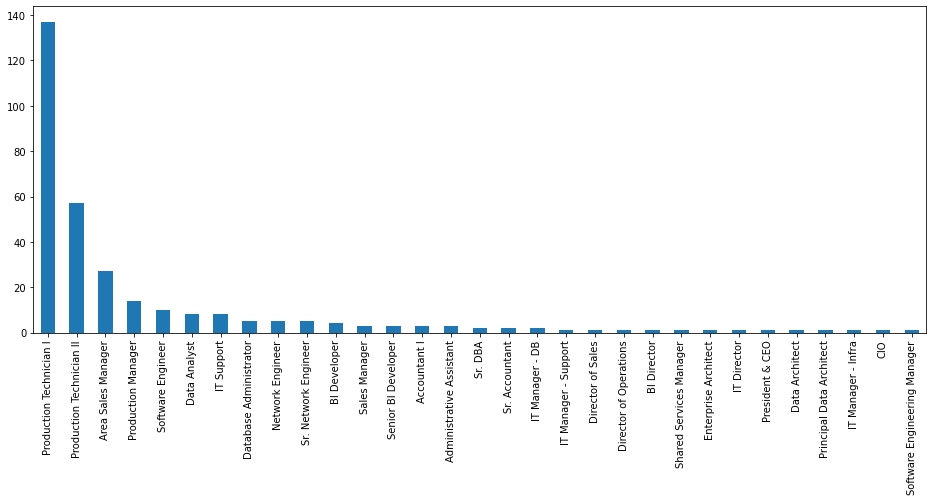

In [138]:
plt.figure(figsize=(16,6))
data['Position'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Age', ylabel='Salary'>

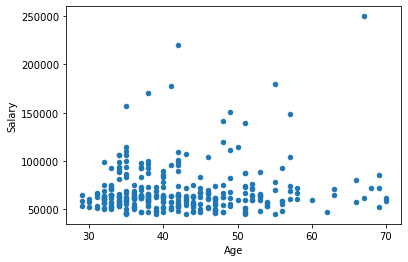

In [139]:
# Find relation between Age and Salary

data.plot(x='Age',y='Salary',kind='scatter')

Looks like there is no relation between Age and Salary.

<AxesSubplot:xlabel='Department'>

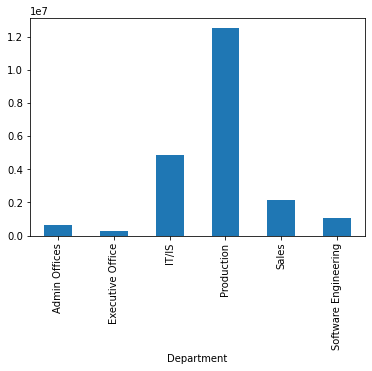

In [140]:
# Find better paying departments

data.groupby('Department')['Salary'].sum().plot(kind='bar')

Production department tops and then IT.

<AxesSubplot:xlabel='Position'>

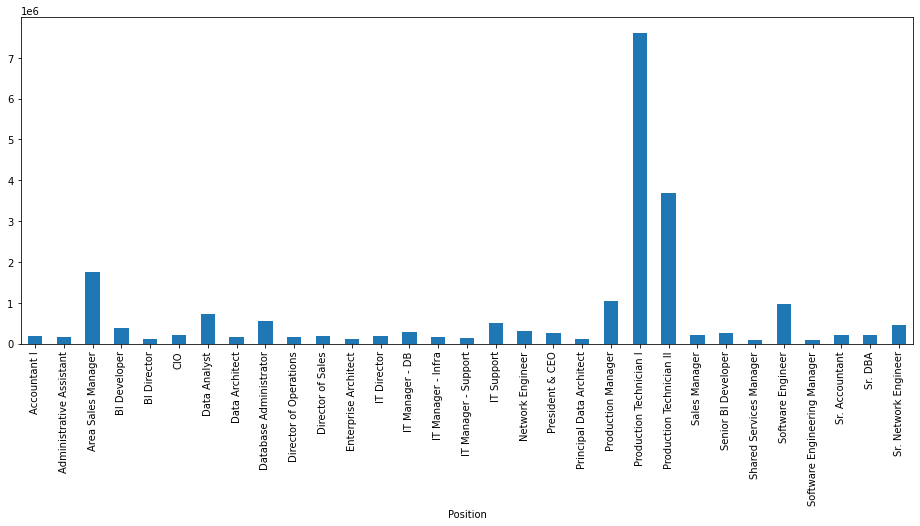

In [141]:
# Find position and salary
plt.figure(figsize=(16,6))
data.groupby('Position')['Salary'].sum().plot(kind='bar')

Production department tops again

<AxesSubplot:>

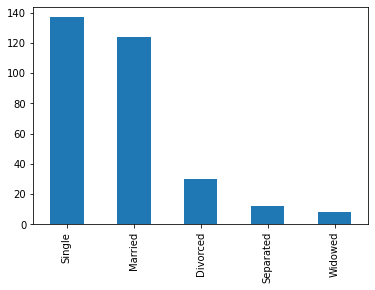

In [142]:
# Employee stats by marital status
data['MaritalDesc'].value_counts().plot(kind='bar')

Most are either single or married

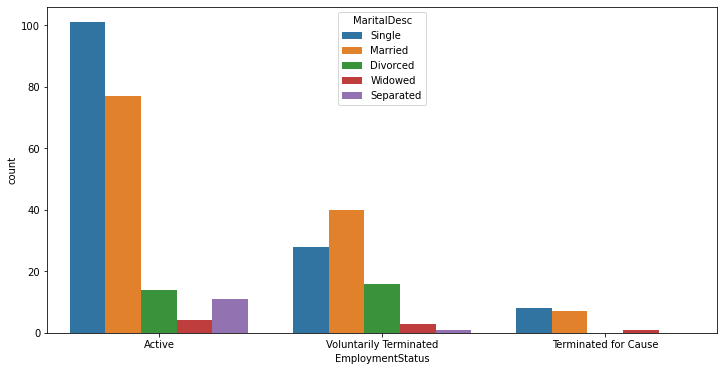

In [143]:
# Employee status against marital status

plt.figure(figsize=(12,6))
ax=sns.countplot(x=data['EmploymentStatus'],hue=data['MaritalDesc'])

Seems there is voluntary termination during marriage/divorce

<AxesSubplot:xlabel='YearsOfExperience', ylabel='Salary'>

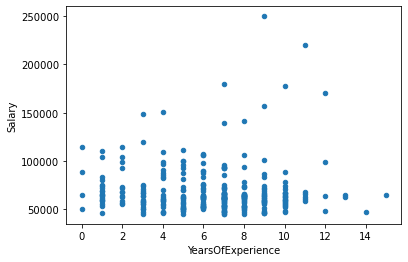

In [144]:
# Find relation days employed and Salary

data.plot(x='YearsOfExperience',y='Salary',kind='scatter')

Looks like there is no relation between days employed and salary

/Users/hussain/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CitizenDesc', ylabel='Salary'>

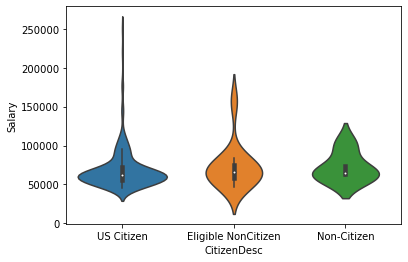

In [145]:
# Few more checking.
# CitizenDesc Vs Salary
sns.violinplot('CitizenDesc', 'Salary', data = data)

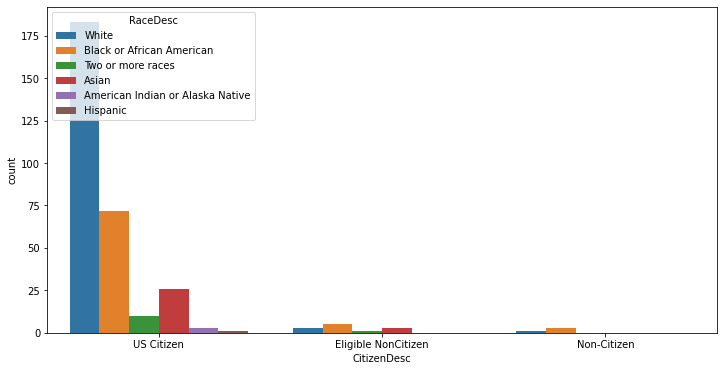

In [146]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x=data['CitizenDesc'],hue=data['RaceDesc'])

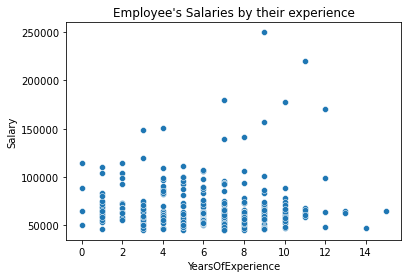

In [147]:
sns.scatterplot(x=data['YearsOfExperience'],y=data['Salary'])

plt.title("Employee's Salaries by their experience")
plt.show()

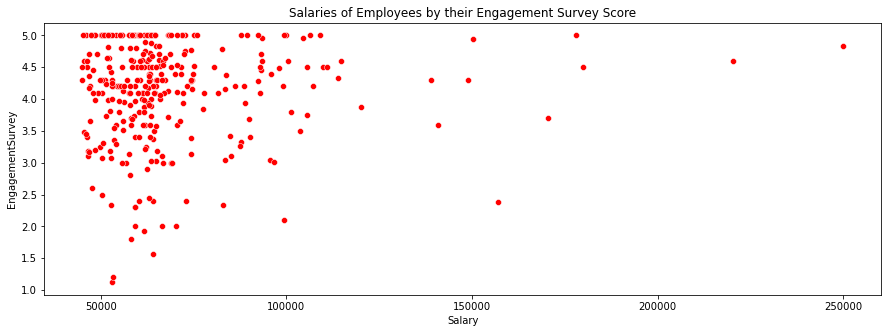

In [148]:
plt.figure(figsize=(15,5))

sns.scatterplot(x=data['Salary'],y=data['EngagementSurvey'],color="r")

plt.title("Salaries of Employees by their Engagement Survey Score")
plt.show()

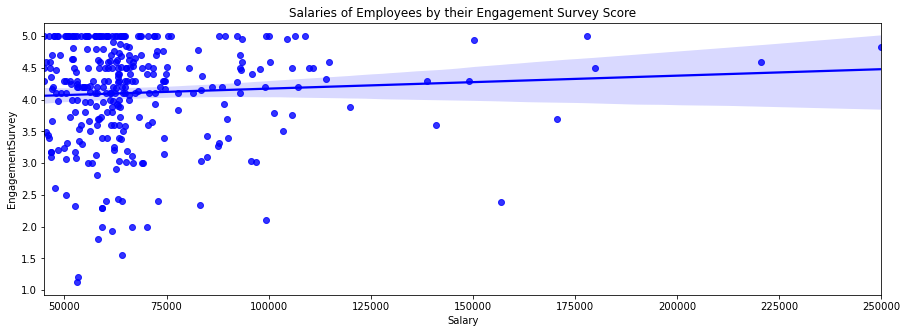

In [149]:
plt.figure(figsize=(15,5))

sns.regplot(x=data['Salary'],y=data['EngagementSurvey'],color="b")

plt.title("Salaries of Employees by their Engagement Survey Score")
plt.show()

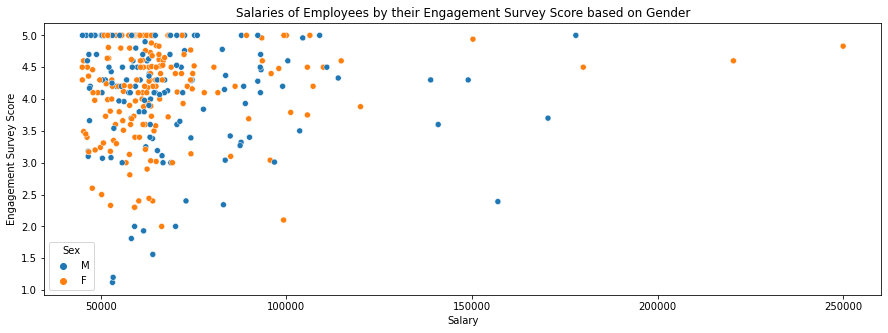

In [150]:
plt.figure(figsize=(15,5))

sns.scatterplot(x=data['Salary'],y=data['EngagementSurvey'],hue=data['Sex'])

plt.xlabel("Salary")
plt.ylabel("Engagement Survey Score")

plt.title("Salaries of Employees by their Engagement Survey Score based on Gender")
plt.show()


/Users/hussain/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


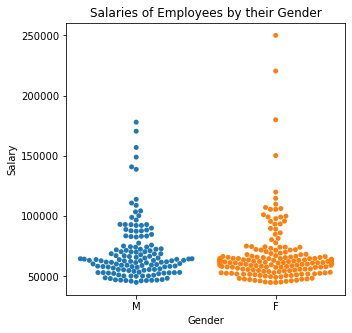

In [151]:
plt.figure(figsize=(5,5))

sns.swarmplot(x="Sex",y="Salary",data=data)

plt.xlabel("Gender")
plt.ylabel("Salary")

plt.title("Salaries of Employees by their Gender")
plt.show()

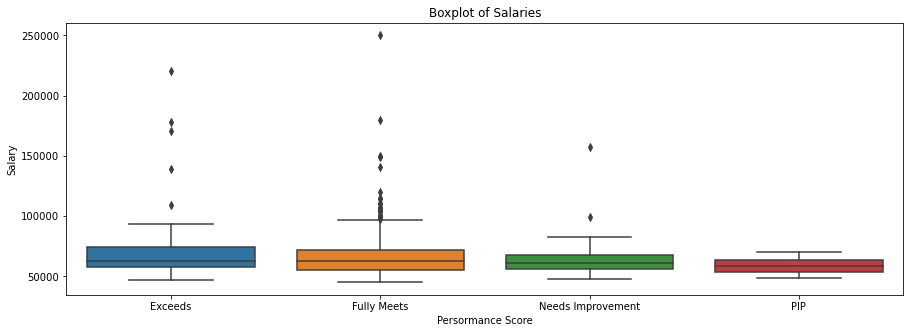

In [152]:
plt.figure(figsize=(15,5))

sns.boxplot( x=data["PerformanceScore"], y=data["Salary"] )

plt.title("Boxplot of Salaries")
plt.ylabel("Salary")
plt.xlabel("Persormance Score")

plt.show()

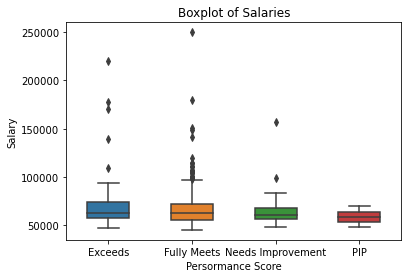

In [153]:
sns.boxplot( x=data["PerformanceScore"], y=data["Salary"],width=0.5)

plt.title("Boxplot of Salaries")
plt.ylabel("Salary")
plt.xlabel("Persormance Score")

plt.show()

/Users/hussain/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


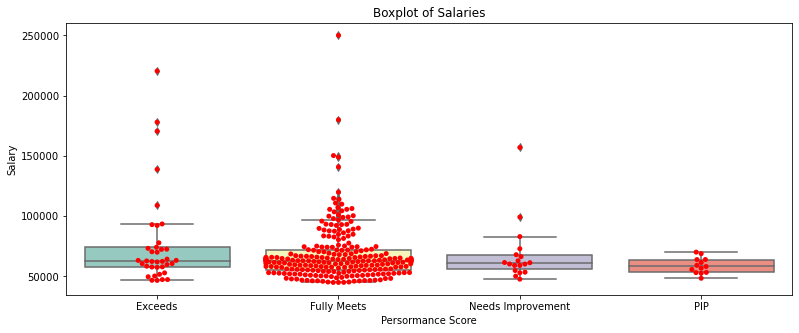

In [154]:
plt.figure(figsize=(13,5))

sns.boxplot(x="PerformanceScore", y="Salary",data=data, palette="Set3")
sns.swarmplot(x="PerformanceScore", y="Salary",data=data,color="r")

plt.title("Boxplot of Salaries")
plt.ylabel("Salary")
plt.xlabel("Persormance Score")

plt.show()

In [155]:
# Categorical Columns
cat_col=['Position', 'Sex', 'MaritalDesc', 'Department']
# Numerical Columns
num_col=['Age', 'YearsOfExperience']

In [156]:
# Function to plot salary vs categorical plot
def cat_plot(data):
    for col in cat_col:
        f, ax = plt.subplots(figsize=(12, 6))
        sns.boxplot(x=col,y='Salary', data=data)
        plt.xlabel(col)
        plt.title('{}'.format(col))

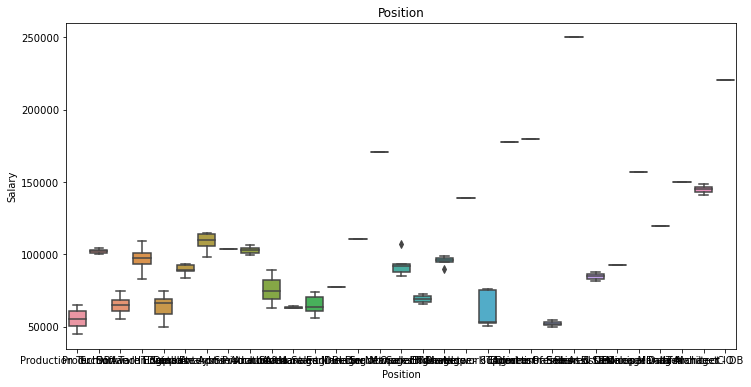

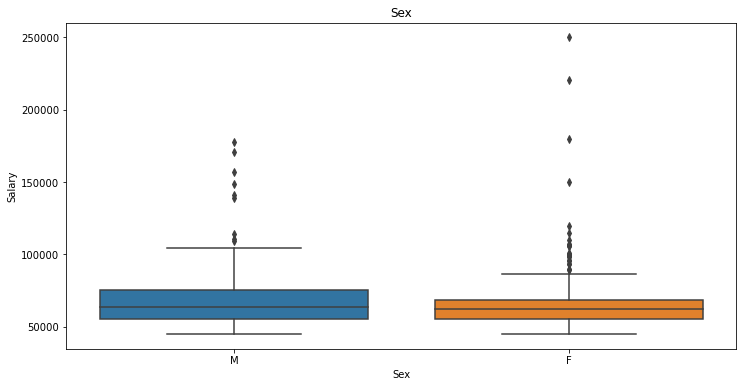

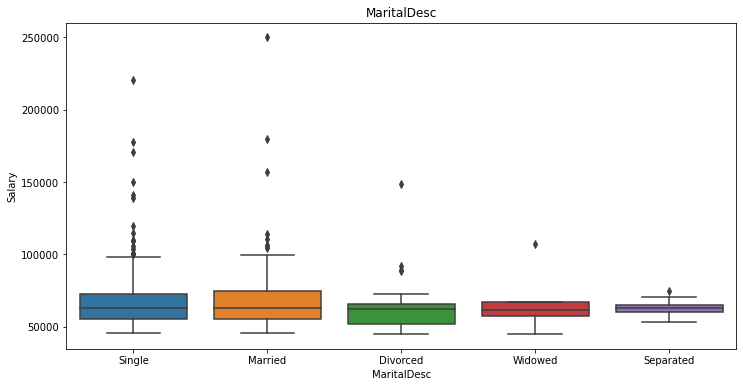

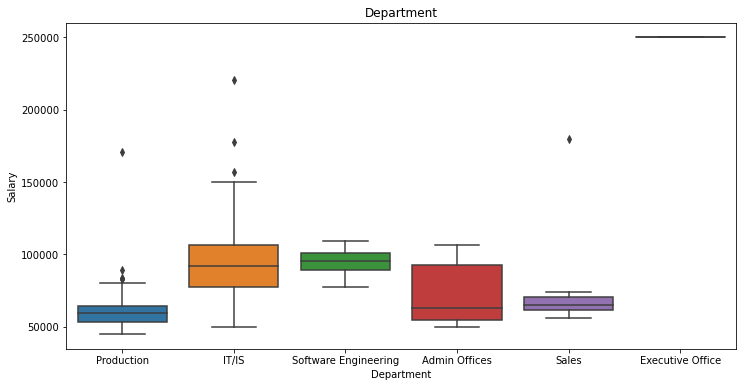

In [157]:
cat_plot(data)

From the above plots, it is seen that IT/IS having a better salary and executive office is an exception, but we cannot consider it as an outlier.

In [158]:
# Function to plot salary vs numerical plot
def numerical_plot(data):
    for col in num_col:
        f, ax = plt.subplots(figsize=(10, 6))
        mean = data.groupby(col)['Salary'].mean()
        mean.plot()
        plt.xlabel(col)
        plt.ylabel('Salary')
        plt.title('{} vs {}'.format('Salary',col))

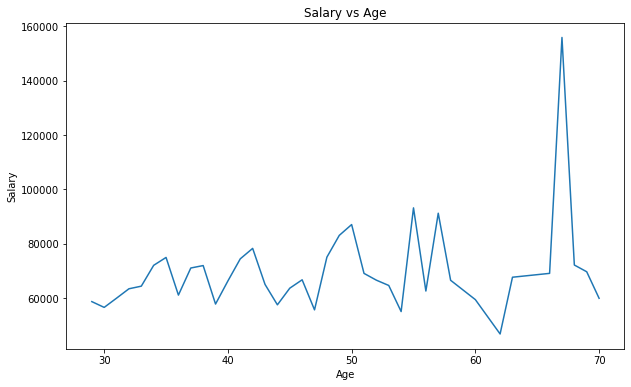

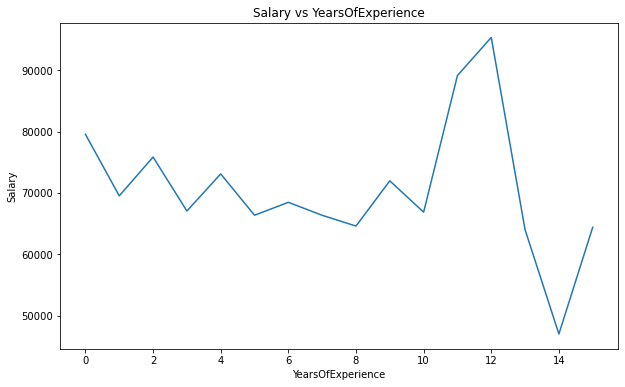

In [159]:
numerical_plot(data)

It is obvious that age is strongly positively correlated with salary whereas years of experience is not giving any meaningful relationship. This may be due to the calculated experience which showing experience within the company only and also due to the inclusion of less paying employees with higher experience within the company itself within our dataset.

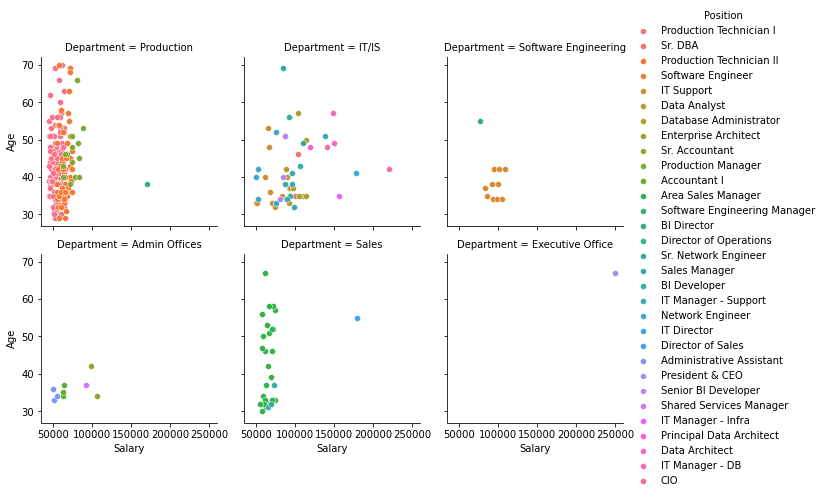

In [160]:
# Check the salary vs age relation among departments against positions
grid = sns.FacetGrid(data, col = "Department", hue = "Position", col_wrap=3)
grid.map(sns.scatterplot, "Salary", "Age")

grid.add_legend()

plt.show()

In [161]:
# Function to create scatter plot
def scatter_plot(data, colmn):
    depts = data['Department'].unique().tolist()
    for dept in depts:
        data1 = data.loc[((data['Department'] == dept))]
        grid = sns.FacetGrid(data1, col = "Department", hue = "Position", col_wrap=3)
        grid.map(sns.scatterplot, "Salary", colmn)
        grid.add_legend()
        plt.show()


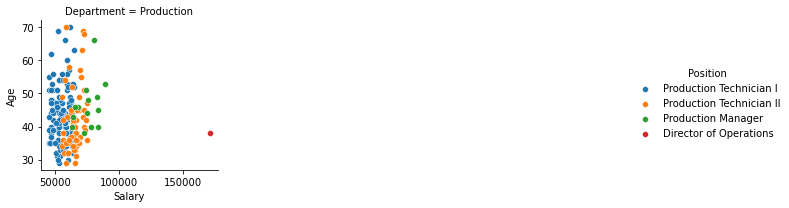

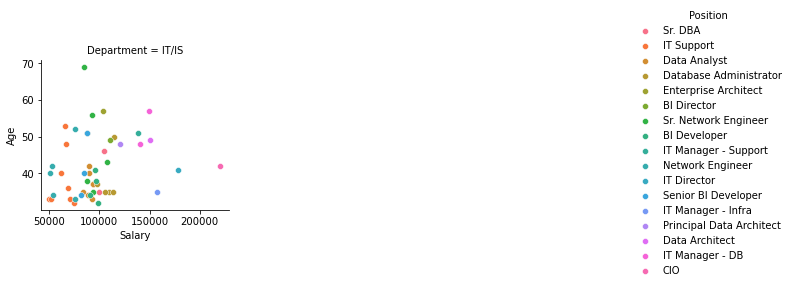

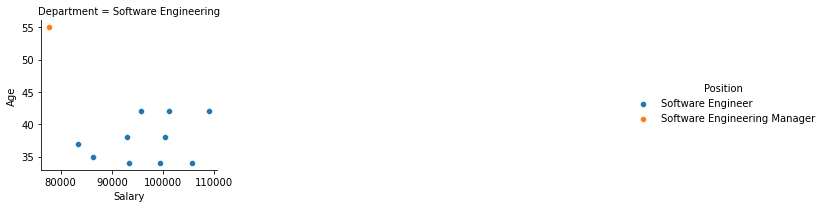

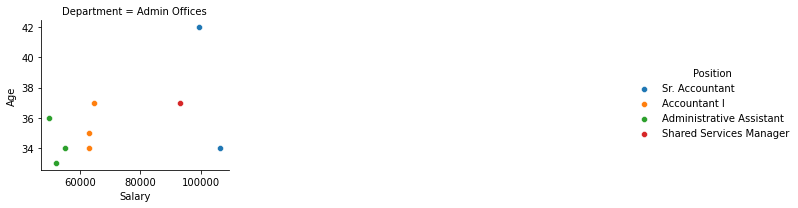

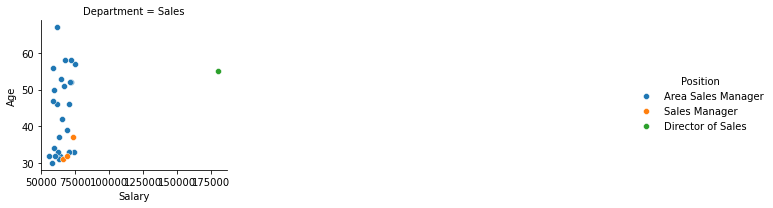

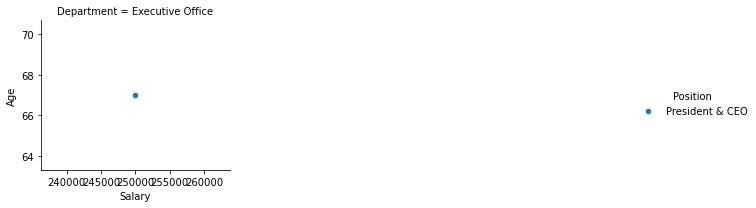

In [162]:
# Check individually by age
scatter_plot(data, 'Age')


Seems there are relations between age and salary.

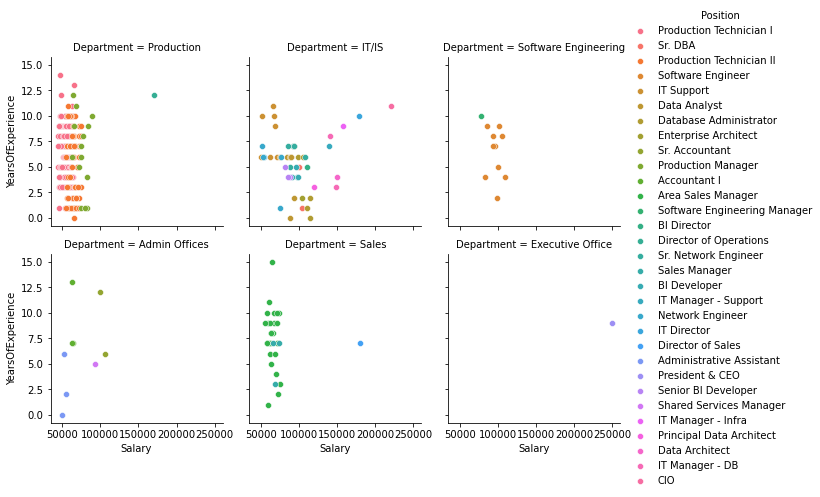

In [163]:
# Now Check the salary vs YearsOfExperience relation among departments against positions
grid = sns.FacetGrid(data, col = "Department", hue = "Position", col_wrap=3)
grid.map(sns.scatterplot, "Salary", "YearsOfExperience")

grid.add_legend()

plt.show()

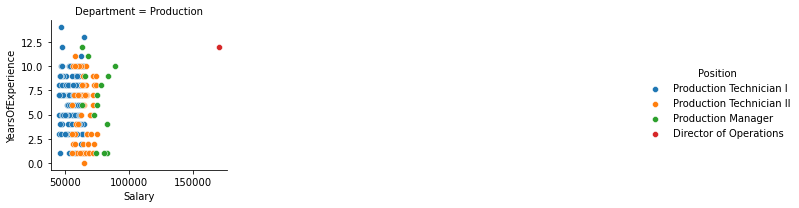

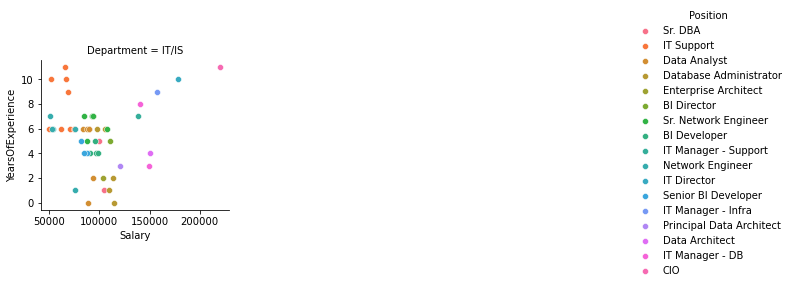

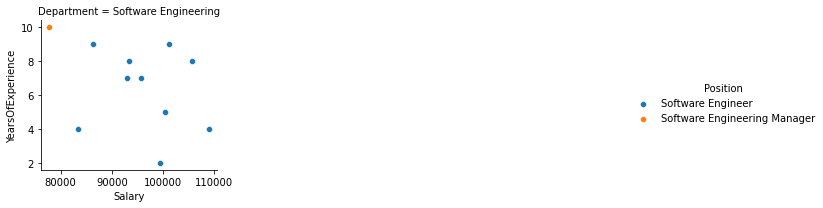

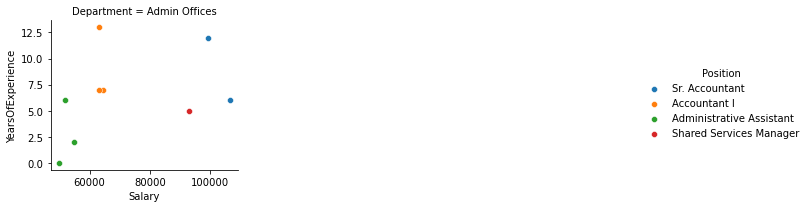

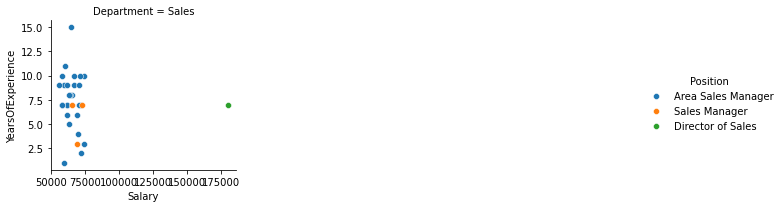

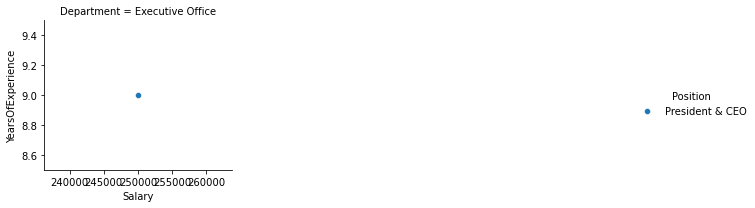

In [164]:
# Now check YearsOfExperience individually using a function
scatter_plot(data, 'YearsOfExperience')

It seems years of experience is unreliable data, so need to discard it from model building.
Also, the salary varying by the department.

In [165]:
# # Take a backup of the processed data
# data.to_csv('proccessed-data-before-model-building-' + datetime.now().strftime("%Y%m%d-%H%M%S") + '.csv')

## Model Creation

In [166]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [167]:
# Check the dataset and remove non-contributing columns towards the salary
# Below columns have no contribution to the target. So dropping them
data.drop(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Termd', 'PositionID', 'Zip',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'ManagerName', 
       'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences','CitizenDesc','HispanicLatino','RaceDesc','State','DOB', 'YearsOfExperience', 'MaritalDesc','Sex'], axis=1, inplace=True)

data

,Salary,Position,Department,Age
0,62506,Production Technician I,Production,38
1,104437,Sr. DBA,IT/IS,46
2,64955,Production Technician II,Production,33
3,64991,Production Technician I,Production,33
4,50825,Production Technician I,Production,32
...,...,...,...,...
306,65893,Production Technician II,Production,36
307,48513,Production Technician I,Production,39
308,220450,CIO,IT/IS,42
309,89292,Data Analyst,IT/IS,42


In [168]:
data.dtypes

Salary         int64
Position      object
Department    object
Age            int64
dtype: object

In [169]:
# Need numeric values for a classifier so we need to encode it.
le = LabelEncoder()
cols = data.columns.tolist()
for column in cols:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])
        
#         # Use below to prepare dropdown list in Flask
#         if column == 'Department':
#             print(le.inverse_transform([0,1,2,3,4,5]))
#         elif column == 'Position':
#             print(le.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]))

data

,Salary,Position,Department,Age
0,62506,21,3,38
1,104437,29,2,46
2,64955,22,3,33
3,64991,21,3,33
4,50825,21,3,32
...,...,...,...,...
306,65893,22,3,36
307,48513,21,3,39
308,220450,5,2,42
309,89292,6,2,42


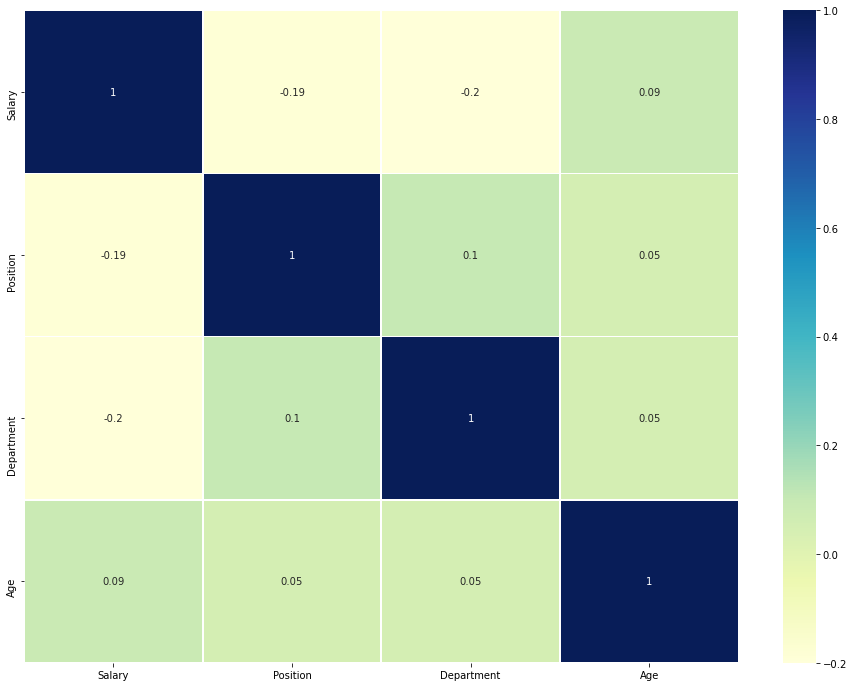

In [170]:
#  Corr Heatmap 
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(data=data.corr().round(2), annot=True, linewidths=0.7, cmap='YlGnBu')
plt.show()

From the heatmap, it seems Age has a positive correlation with salary. However, the department and position have a negative correlation with salary.

In [171]:
# # Take a backup of the encoded data for use as model inputs
data.to_csv('data-encoded-before-train_test_split-' + datetime.now().strftime("%Y%m%d-%H%M%S") + '.csv')

In [172]:
# Proceed to model building 
X=data.drop(['Salary'],axis=1)
y=data['Salary']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=32)

In [173]:
# Sample value for salary prediction. 
# Format as [Position, Department, Age]
sample = [30,2,46]
np_sample = np.array(sample)

result = pd.DataFrame(columns=['Model', 'MSE', 'R2'])

In [174]:
#Linear Regression Model
reg = LinearRegression()

#Fitting the model
m=reg.fit(X_train, y_train)
y_pred = m.predict(X_test)

#Evaulating the model.
print('MSE      : ', mean_squared_error(y_test, y_pred))
print('R2 Score : ', r2_score(y_test, y_pred))

# get results
result = result.append({'Model': 'LinearRegression', 'MSE': mean_squared_error(y_test, y_pred), 'R2': r2_score(y_test, y_pred)}, ignore_index=True)

MSE      :  603553303.814454
R2 Score :  0.03695835477425735


In [175]:
predictions = m.predict(X)
data['Salary_LinearRegression'] = predictions
# Attempt a salary prediction
pred = m.predict(np_sample.reshape(1, -1)).tolist()
pred

[70754.33364890068]

In [176]:
#Performing Logisitic Regression.
logit_model = LogisticRegression()

#Fitting the model
m=logit_model.fit(X_train, y_train)
y_pred = m.predict(X_test)

#Evaulating the model.
print('MSE      : ', mean_squared_error(y_test, y_pred))
print('R2 Score : ', r2_score(y_test, y_pred))

# get results
result = result.append({'Model': 'LogisticRegression', 'MSE': mean_squared_error(y_test, y_pred), 'R2': r2_score(y_test, y_pred)}, ignore_index=True)

MSE      :  421759891.18085104
R2 Score :  0.32703153652539085


/Users/hussain/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [177]:
predictions = m.predict(X)
data['Salary_LogisticRegression'] = predictions

# Attempt a salary prediction
pred = m.predict(np_sample.reshape(1, -1)).tolist()
pred

[104437]

In [178]:
# Prediction using KNN
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski')

#Fitting the model
m=classifier.fit(X_train, y_train)
y_pred = m.predict(X_test)

#Evaulating the model.
print('MSE      : ', mean_squared_error(y_test, y_pred))
print('R2 Score : ', r2_score(y_test, y_pred))

# get results
result = result.append({'Model': 'KNeighborsClassifier', 'MSE': mean_squared_error(y_test, y_pred), 'R2': r2_score(y_test, y_pred)}, ignore_index=True)

MSE      :  538026796.1382979
R2 Score :  0.1415137525486061


In [179]:
predictions = m.predict(X)
data['Salary_KNeighborsClassifier'] = predictions

# Attempt a salary prediction
pred = m.predict(np_sample.reshape(1, -1)).tolist()
pred

[95660]

In [180]:
# Prediction using DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

#Fitting the model
m=dt_model.fit(X_train, y_train)
y_pred = m.predict(X_test)

#Evaulating the model.
print('MSE      : ', mean_squared_error(y_test, y_pred))
print('R2 Score : ', r2_score(y_test, y_pred))

# get results
result = result.append({'Model': 'DecisionTreeClassifier', 'MSE': mean_squared_error(y_test, y_pred), 'R2': r2_score(y_test, y_pred)}, ignore_index=True)

MSE      :  371406798.61702126
R2 Score :  0.40737593162422436


In [181]:
predictions = m.predict(X)
data['Salary_DecisionTreeClassifier'] = predictions

# Attempt a salary prediction
pred = m.predict(np_sample.reshape(1, -1)).tolist()
pred

[104437]

In [182]:
# Prediction using RandomForestClassifier
rf = RandomForestClassifier()

#Fitting the model
m=rf.fit(X_train, y_train)
y_pred = m.predict(X_test)
#Evaulating the model.
print('MSE      : ', mean_squared_error(y_test, y_pred))
print('R2 Score : ', r2_score(y_test, y_pred))

# get results
result = result.append({'Model': 'RandomForestClassifier', 'MSE': mean_squared_error(y_test, y_pred), 'R2': r2_score(y_test, y_pred)}, ignore_index=True)

MSE      :  455324063.4255319
R2 Score :  0.273475876312992


In [183]:
predictions = m.predict(X)
data['Salary_RandomForestClassifier'] = predictions

# Attempt a salary prediction
pred = m.predict(np_sample.reshape(1, -1)).tolist()
pred

[87565]

In [184]:
# View the result for comparison 
pd.options.display.float_format = "{:.2f}".format
result

,Model,MSE,R2
0,LinearRegression,603553303.81,0.04
1,LogisticRegression,421759891.18,0.33
2,KNeighborsClassifier,538026796.14,0.14
3,DecisionTreeClassifier,371406798.62,0.41
4,RandomForestClassifier,455324063.43,0.27


DecisionTreeClassifier provides best results comparable to other models

In [185]:
# Save a backup of the processed data for manual inspection
data.to_csv('proccessed-data-with_all_salary_predictions-' + datetime.now().strftime("%Y%m%d-%H%M%S") + '.csv')